# UltimateTechnologies Take Home Challenge Part 3 EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.


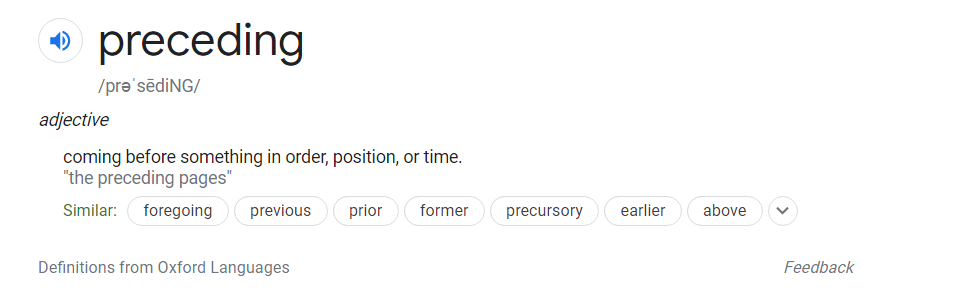

In [2]:
# 30 days preceding what date? Let's keep this in mind as it is not given explicitly

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?<br/><br/>
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.<br/><br/>
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).<br/><br/>

Data description:

city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier >1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
# Can use MAX(last_trip_date) for the most recent date 
#the time span for churn can be from MAX(last_trip_date) - 30 days

In [4]:
# Create a dataframe logins json

data = pd.read_json('ultimate_data_challenge.json')

In [5]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
data.info() # Check number of rows, null values, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
# First thing to note here is the dates are typed as objects (text), so let's fix that

data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [8]:
# Check if there are different cohorts

data['signup_date'].value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

# Figure out Retained vs Not Retained Target 

In [9]:
# All sign up dates are from January. A suggestion is to include different cohorts in case January has latent variables
# that might not be accounted for and could affect retention, such as cold weather for example.
# Ok. let's check our retention parameters, like what's our last date.

max(data['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

In [10]:
# Get our target by subtracting 30 days since the requirement for "retained"
# June has a length of 30 days, giving us '2014-06-01'
# as the threshold

not_retained = data['last_trip_date'] < '2014-06-01'
data['retained'] = 1
data['retained'].values[not_retained] = 0
data['retained'].head()

0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int64

# Retained vs Not Retained Proportions

quantity not retained vs retained
0    31196
1    18804
Name: retained, dtype: int64
percentage not retained vs retained
0    62.392
1    37.608
Name: retained, dtype: float64


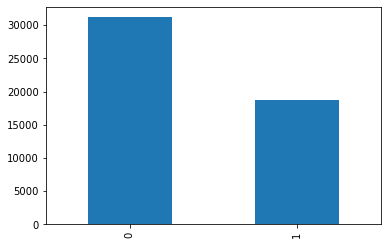

In [11]:
# What are the value counts for retained vs not retained - NOTE COUNTS AND PERCENTAGES
print("quantity not retained vs retained")
print(data['retained'].value_counts())
print("percentage not retained vs retained")
print(str(data['retained'].value_counts().astype(float)/len(data['retained']) * 100))
data['retained'].value_counts().plot(kind='bar');

# We have 62.39 % Retention Loss

# Propotion Retained vs Not Retained By City

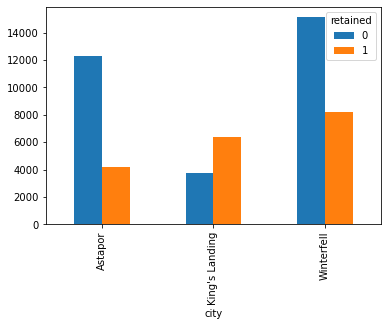

In [12]:
data[['city','retained']].value_counts().unstack().plot(kind='bar');

# Winterfell has the highest total retention loss at 15,123, with Astapor Following at 12,306. King's Landing has much lower total retention loss at 3767

In [13]:
data[['city','retained']].value_counts()

city            retained
Winterfell      0           15123
Astapor         0           12306
Winterfell      1            8213
King's Landing  1            6363
Astapor         1            4228
King's Landing  0            3767
dtype: int64

In [14]:
# There is no explanation on what specific surge method was used but the two measurements of surge are
# probably correlated, let's check and if so, pick one for prediction 

data[['surge_pct','avg_surge']].corr()

,surge_pct,avg_surge
surge_pct,1.000000,0.793582
avg_surge,0.793582,1.000000


# Max Avg Surge By City And Proportion Retained vs Not Retained

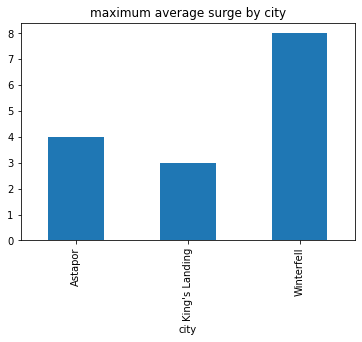

In [15]:
# We are keeping avg surge as it will be easier to work with, we can check
# the maximum avg surge values

data[['city','avg_surge']].groupby(['city'])['avg_surge'].\
max().plot(kind='bar', title='maximum average surge by city');

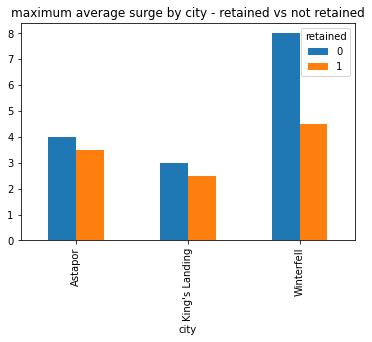

In [16]:
# Check proportion of retained and not retained in relation to max avg surge

data[['city','avg_surge','retained']].groupby(['city','retained'])['avg_surge'].\
max().unstack().plot(kind='bar', title='maximum average surge by city - retained vs not retained');

# Plotting Maximum Avg Surge by city by retained or not retained shows higher retention loss with higher avg surge values, with Winterfell showing the highest retention loss and the highest max avg surge

In [17]:
data[['city','avg_surge','retained']].groupby(['city','retained'])['avg_surge'].\
max()

city            retained
Astapor         0           4.0
                1           3.5
King's Landing  0           3.0
                1           2.5
Winterfell      0           8.0
                1           4.5
Name: avg_surge, dtype: float64

# What proportion of the not retained users with maximum avg surge took an ultimate black in their first thirty days

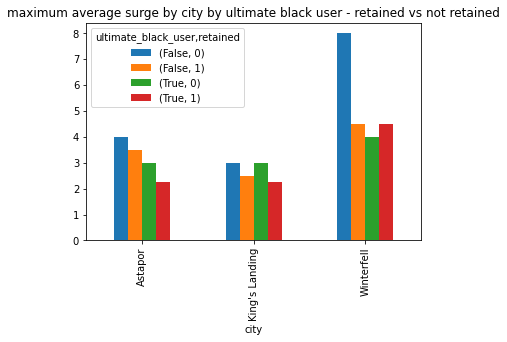

In [18]:
data[['city','retained','avg_surge', 'ultimate_black_user']].\
groupby(['city','retained', 'ultimate_black_user'])['avg_surge'].\
max().unstack().unstack().plot(kind='bar', title='maximum average surge by city by ultimate black user - retained vs not retained');

# Users from Winterfell with maximum avg surge that did not take an ultimate black in the first thirty days show the highest proportion of not retained

In [19]:
data[['city','retained','avg_surge', 'ultimate_black_user']].\
groupby(['city','retained', 'ultimate_black_user'])['avg_surge'].\
max()

city            retained  ultimate_black_user
Astapor         0         False                  4.00
                          True                   3.00
                1         False                  3.50
                          True                   2.25
King's Landing  0         False                  3.00
                          True                   3.00
                1         False                  2.50
                          True                   2.25
Winterfell      0         False                  8.00
                          True                   4.00
                1         False                  4.50
                          True                   4.50
Name: avg_surge, dtype: float64

# Phone Type

In [20]:
# put a name on null values for phone in case that people who did not reply also have a distribution
data['phone'].fillna('none', inplace=True)

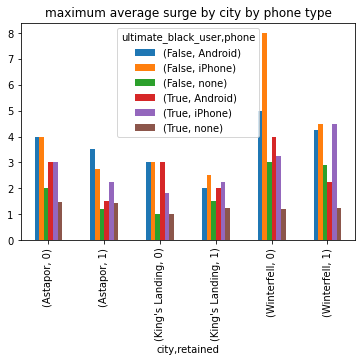

In [21]:
# Incorporate into the pattern found

data[['city','retained','avg_surge', 'phone', 'ultimate_black_user']].\
groupby(['city','retained', 'phone', 'ultimate_black_user'])['avg_surge'].\
max().unstack().unstack().plot(kind='bar', title='maximum average surge by city by phone type');

# Users from Winterfell with maximum avg surge that did not take an ultimate black in the first thirty days and use i-phones show the highest proportion of not retained

In [22]:
data[['city','retained','avg_surge', 'phone', 'ultimate_black_user']].\
groupby(['city','retained', 'phone', 'ultimate_black_user'])['avg_surge'].\
max()

city            retained  phone    ultimate_black_user
Astapor         0         Android  False                  4.00
                                   True                   3.00
                          iPhone   False                  4.00
                                   True                   3.00
                          none     False                  2.00
                                   True                   1.46
                1         Android  False                  3.50
                                   True                   1.50
                          iPhone   False                  2.75
                                   True                   2.25
                          none     False                  1.19
                                   True                   1.42
King's Landing  0         Android  False                  3.00
                                   True                   3.00
                          iPhone   False                  3.00


# When are these patterns occuring?

In [23]:
# Aggregate last trip date by month to visualize


data['last_month_date'] = data['last_trip_date'].dt.month

In [24]:
# check value counts
data['last_month_date'].value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_month_date, dtype: int64

In [25]:
# Check size of June data

len(data[data['last_month_date']==6][['last_month_date','retained']])

18256

In [26]:
# Confirm these are all retained cases

data[data['last_month_date']==6][['last_month_date','retained']].value_counts()

last_month_date  retained
6                1           18256
dtype: int64

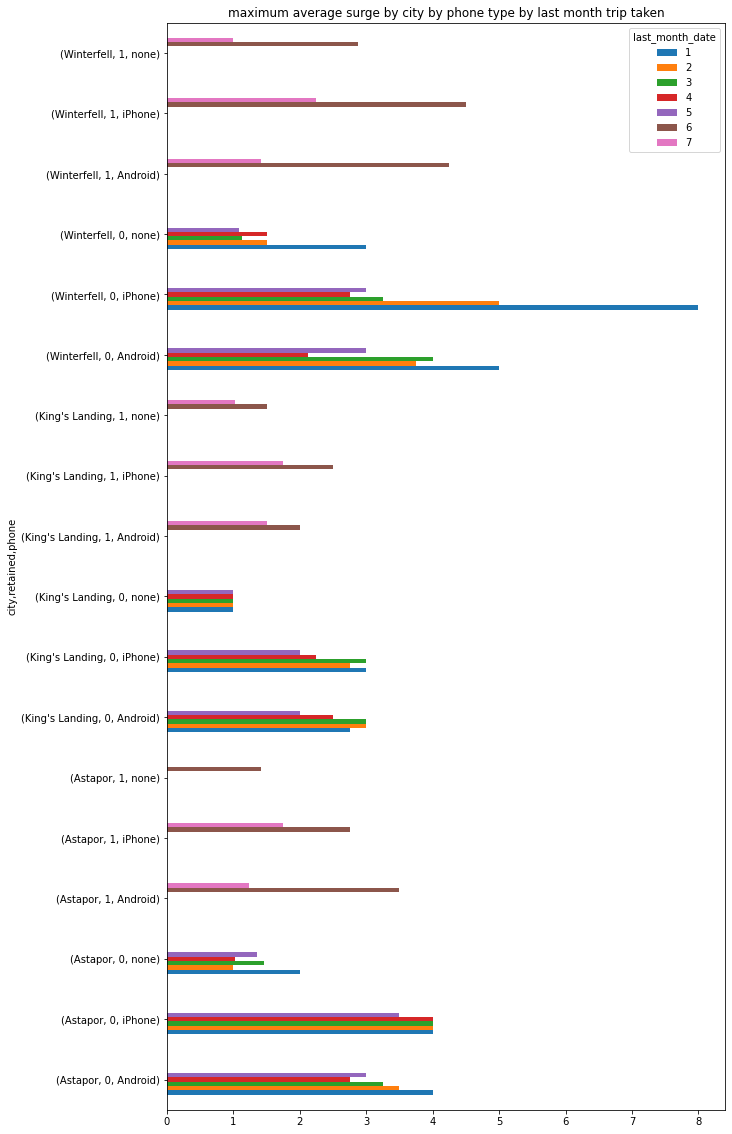

In [27]:
# Check our patter for not retained, winterfell as the city, max avg surge, and last month date
# Recall June and July are all retained dates by the client's definition of active in the preceding
# 30 days

data[['city','retained','avg_surge', 'phone','last_month_date']].\
groupby(['city','retained', 'phone','last_month_date'])['avg_surge'].\
max().unstack().plot(figsize=(10,20), kind='barh', title='maximum average surge by city by phone type by last month trip taken');

# Most not retained cases occurred in January

In [28]:
# Impute null values as 6 - arbitrary number since there are no 6 ratings

data['avg_rating_by_driver'].fillna(6, inplace=True)
data['avg_rating_of_driver'].fillna(6, inplace=True)

In [29]:
# It would be better to bin ratings so that we can classify nulls as none and make sure they
# are treated as categorical variables

bins = [0, 1, 2, 3, 4, 5, 6]
group_names = ['1','2', '3', '4', '5', 'none']
data['avg_rating_of_driver'] = pd.cut(data['avg_rating_of_driver'], bins, labels=group_names)
data['avg_rating_by_driver'] = pd.cut(data['avg_rating_by_driver'], bins, labels=group_names)

# Add ratings to the pattern

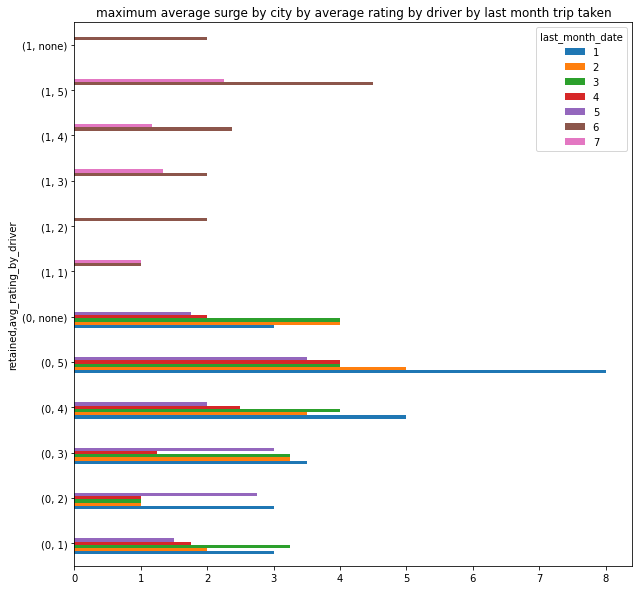

In [30]:
data[['retained','avg_surge', 'avg_rating_by_driver','last_month_date']].\
groupby(['retained', 'avg_rating_by_driver','last_month_date'])['avg_surge'].\
max().unstack().plot(figsize=(10, 10), kind='barh', title='maximum average surge by city by average rating by driver by last month trip taken');

# Most not retained users have an average rating of 5 over all their trips

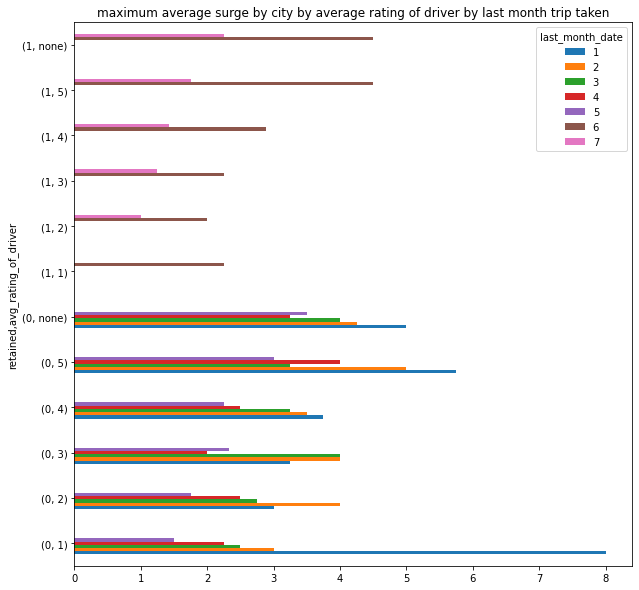

In [31]:
data[['retained','avg_surge', 'avg_rating_of_driver','last_month_date']].\
groupby(['retained', 'avg_rating_of_driver','last_month_date'])['avg_surge'].\
max().unstack().plot(figsize=(10, 10), kind='barh', title='maximum average surge by city by average rating of driver by last month trip taken');

In [32]:
# This data also shows additional non retained numbers from Feb, March, April, but we'll focus on Jan
# Because of all the other data pointing at January as the highest number of not retained, 
# this is worth pointing out, but we need to break this down by city

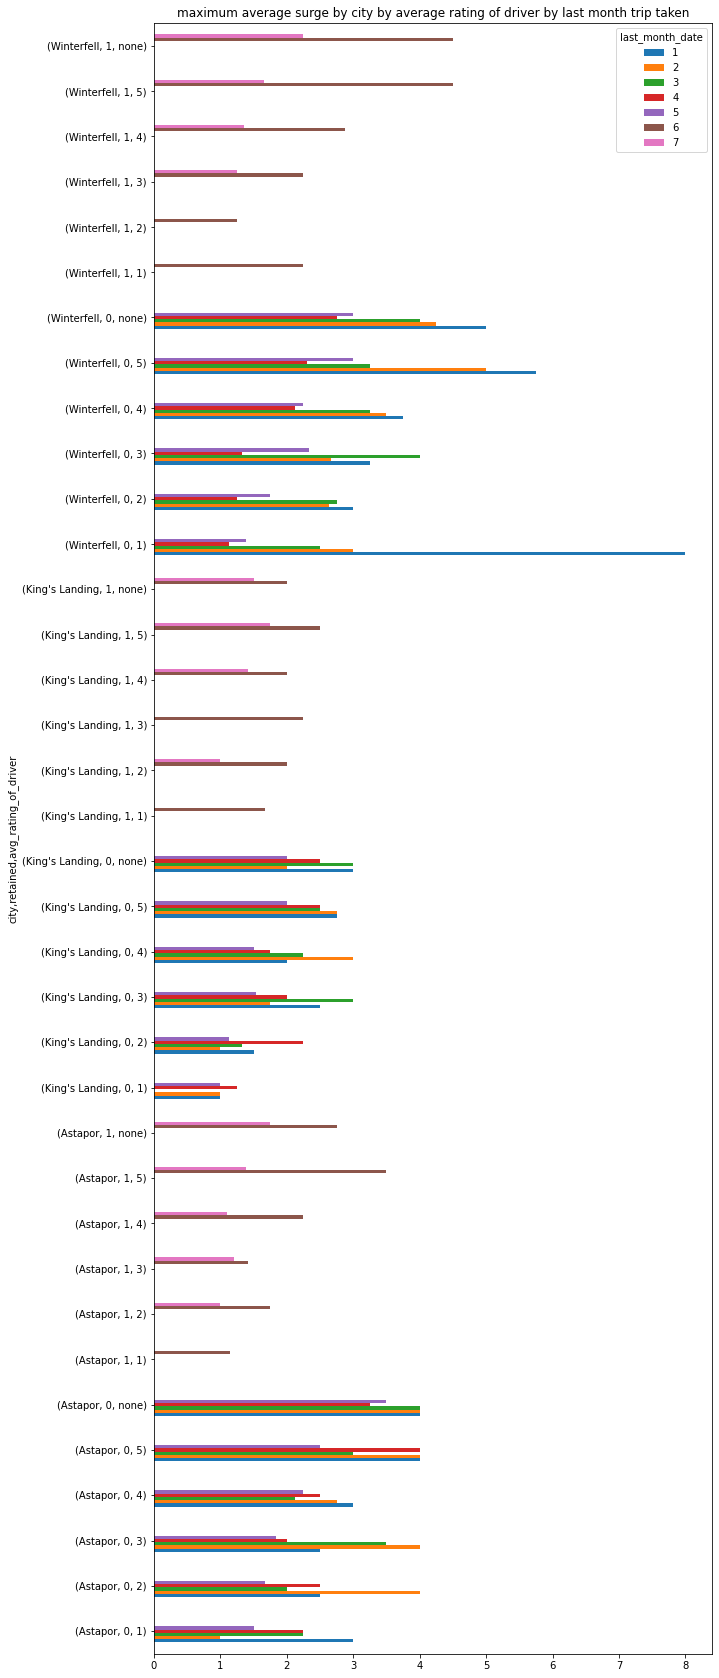

In [33]:
data[['city','retained','avg_surge', 'avg_rating_of_driver','last_month_date']].\
groupby(['city','retained', 'avg_rating_of_driver','last_month_date'])['avg_surge'].\
max().unstack().plot(figsize=(10, 30), kind='barh', title='maximum average surge by city by average rating of driver by last month trip taken');

# Most not retained users have an average rate of 1 for their drivers 

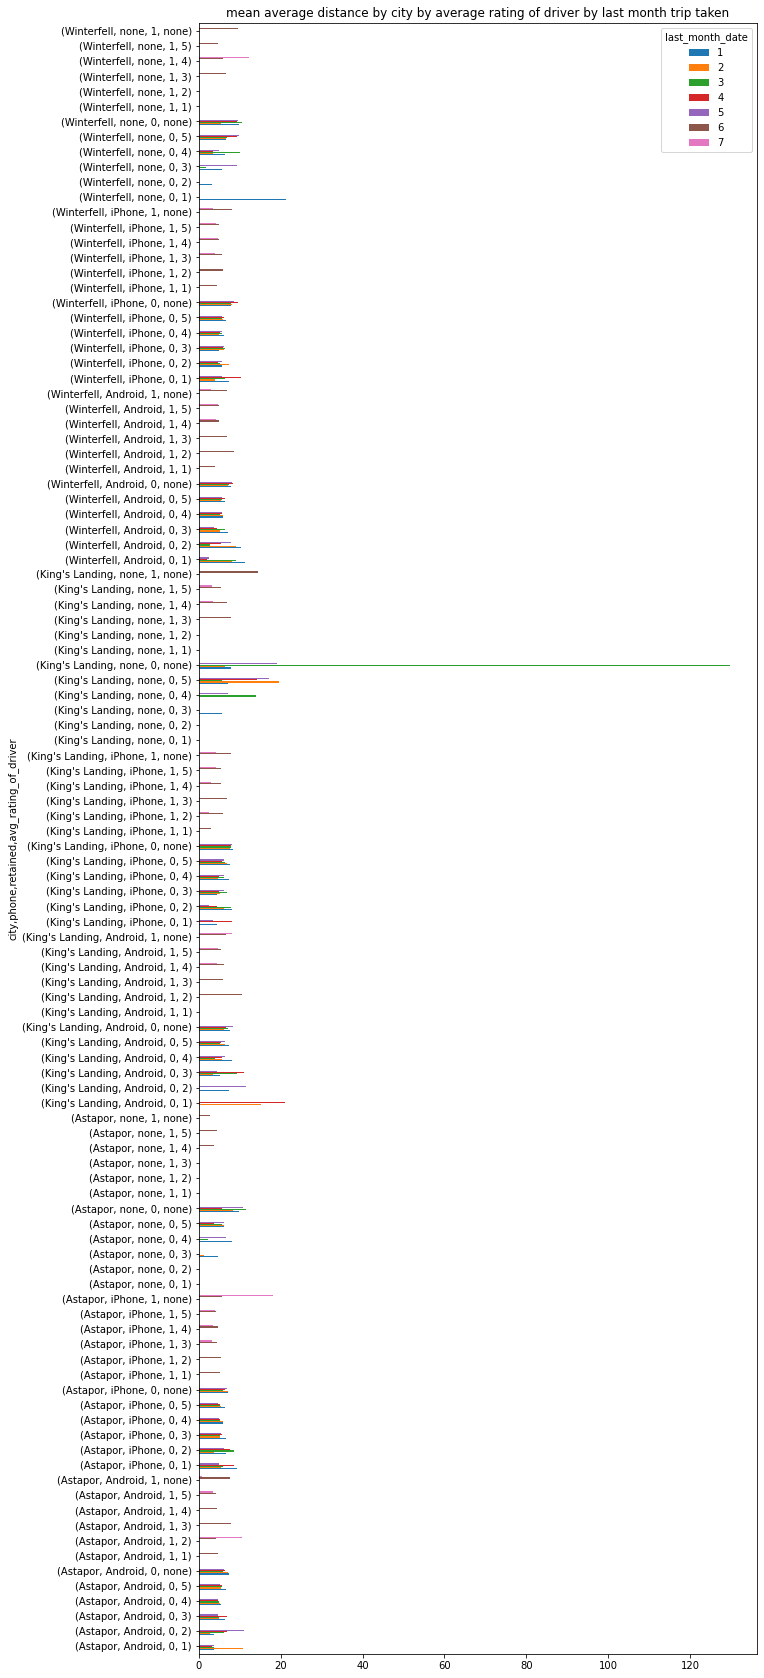

In [34]:
data[['city','phone','retained','avg_dist', 'avg_rating_of_driver','last_month_date']].\
groupby(['city','phone','retained', 'avg_rating_of_driver','last_month_date'])['avg_dist'].\
mean().unstack().plot(figsize=(10, 30), kind='barh', title='mean average distance by city by average rating of driver by last month trip taken');

# King's Landing shows the largest avg distance traveled by far  on the first 30 days by users who were not retained with 'none' for phone and no ratings of driver with March being their last date

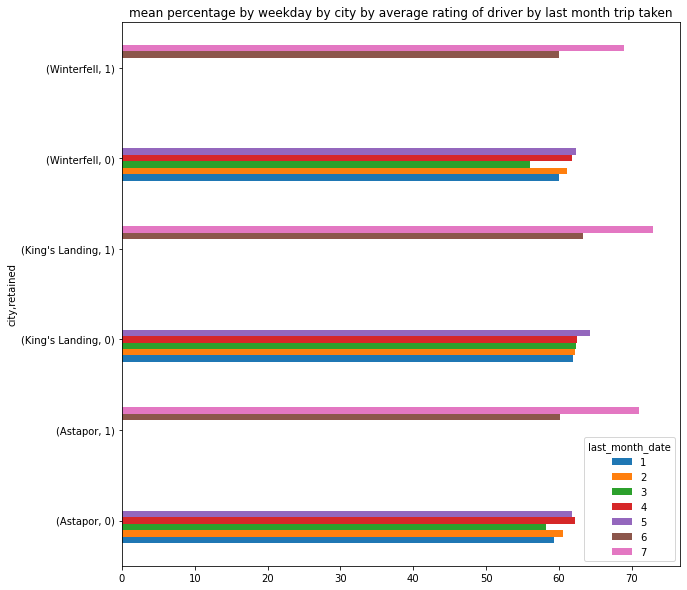

In [35]:
data[['city','retained','weekday_pct','last_month_date']].\
groupby(['city','retained','last_month_date'])['weekday_pct'].\
mean().unstack().\
plot(figsize=(10, 10), kind='barh', 
title='mean percentage by weekday by city by average rating of driver by last month trip taken');

In [36]:
data[['city','retained','weekday_pct','last_month_date']].\
groupby(['city','retained','last_month_date'])['weekday_pct'].\
mean()

city            retained  last_month_date
Astapor         0         1                  59.276494
                          2                  60.491383
                          3                  58.180183
                          4                  62.172091
                          5                  61.723108
                1         6                  60.120998
                          7                  71.039394
King's Landing  0         1                  61.955538
                          2                  62.203019
                          3                  62.353628
                          4                  62.437476
                          5                  64.204711
                1         6                  63.283961
                          7                  72.954187
Winterfell      0         1                  60.045473
                          2                  61.147806
                          3                  56.033895
                       

# Retained users for all three cities have a weekday percent of trips of about 70 percent on average for those that took their last trip in July, vs 60 percent on average of not retained users from Winterfell who took their last trip in January

In [42]:
data['trips_in_first_30_days'].astype('int').isnull().any()

False

In [44]:
bins = [-np.inf, 0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
group_names = ['0','1','10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130']
data['trips_in_first_30_days'] = pd.cut(data['trips_in_first_30_days'], bins, labels=group_names)

In [46]:
data['trips_in_first_30_days'].isnull().any()

False

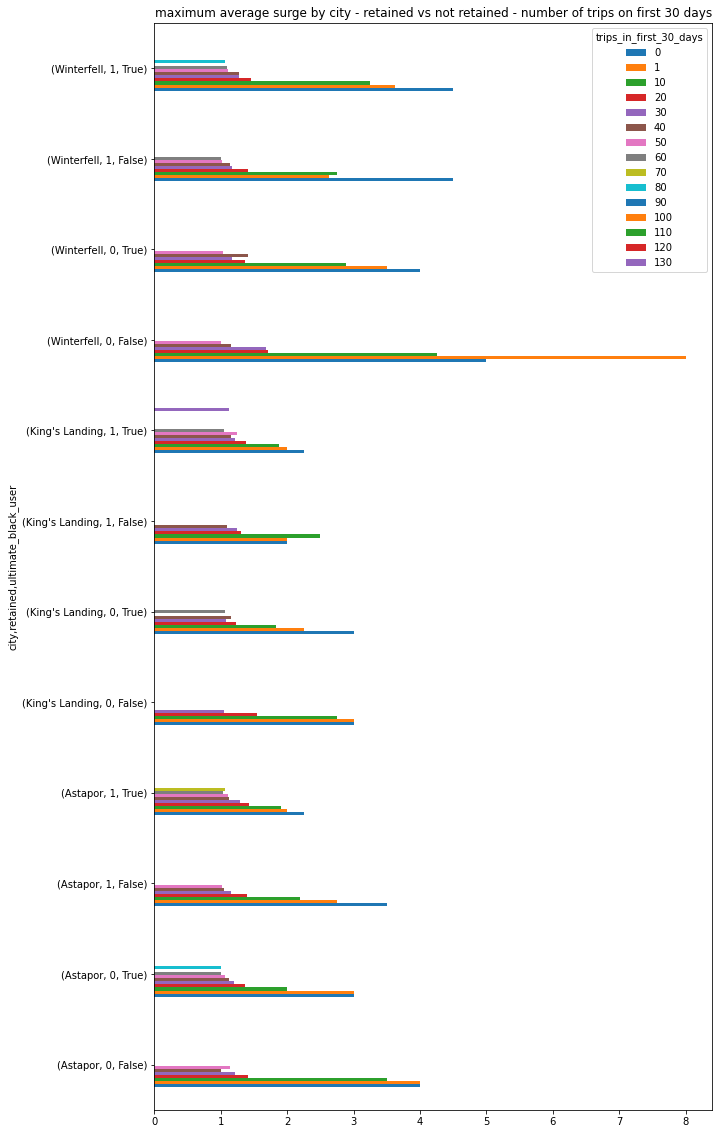

In [47]:
data[['city','avg_surge','trips_in_first_30_days','retained', 'ultimate_black_user']].groupby(['city','retained','ultimate_black_user','trips_in_first_30_days'])['avg_surge'].\
max().unstack().plot(figsize=(10, 20), kind='barh', title='maximum average surge by city - retained vs not retained - number of trips on first 30 days');


# Summary of Not Retained User Patterns:

* From Winterfell 
* Maximum avg surge of 8 - the highest surge
* Did not take an ultimate black in the first thirty days 
* Use i-phones
* Month for biggest retention loss is january
* Have an average rating of 5 all their trips
* Have an average rating of 1 for their drivers
* 60 percent of their trips are on the weekdays vs 70 percent for retained users
* Have an average of one trip in the first 30 days




### A possible theory is that people are coming back from Christmas or New Year's vacation or both, this would explain the maximum avg surge. The demand for drivers is very high but it is a one time deal. They did not use the premium service, ultimate black, because there was no incentive to do so, all they intended to do was go back home, this would explain the retention loss. The i-phones could give small hint that the users are affluent and have their own cars at home. To match the story line the users enjoyed the car and the condition of the car, the ride itself but maybe because of the huge demand, traffic was thick, drivers were also extremely busy, pressured and maybe not in a good mood so the drivers received low ratings. The trip was short or normal size on avg. Winterfell appears to be the larger of the three cities, we can assume the users were not far, on average, from the airport (assuming that is where they came from).

### Improving the driver scores would be most important in this case, finding methods to improve their mood and stress levels if that is the factor that is causing low ratings. User experience is very important, the demand during this period is very high and might make up for the fact that drivers use the service only once a year. Certainly if they are having a bad experience with the drivers during this infrequent ride, they might be using a different company the next time around

In [48]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'last_month_date'],
      dtype='object')

In [59]:
data['signup_day'] = data['signup_date'].dt.day

In [60]:
data['last_month_day'] = data['last_trip_date'].dt.day

In [61]:
dataset = data[['city', 'trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'phone',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'signup_day', 'last_month_date', 'last_month_day']]

In [62]:
dataset = dataset.to_csv(r'C:\Users\Jorge\OneDrive\My Documents\SpringBoard\dataset', header=True)